In [2]:
from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/", one_hot=False)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/t10k-labels-idx1-ubyte.gz


In [54]:
# Parameters
learning_rate = 0.1
num_steps = 1000
batch_size = 128
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_hidden_3 = 256 # 3rd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

In [55]:
# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)

In [61]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f46787be358>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f4678506a58>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f4678506c18>)

In [56]:
# Define the neural network
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.layers.dense(x['images'], n_hidden_1)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    # Output fully connected layer with a neuron for each class
    layer_3 = tf.layers.dense(layer_2, n_hidden_3)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.layers.dense(layer_3, num_classes)
    return out_layer

In [57]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    
    # Build the neural network
    logits = neural_net(features)
    
    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)
    
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})

    return estim_specs

In [58]:
# Build the Estimator
model = tf.estimator.Estimator(model_fn,model_dir='model/')

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_service': None, '_is_chief': True, '_master': '', '_model_dir': 'model/', '_keep_checkpoint_every_n_hours': 10000, '_task_id': 0, '_session_config': None, '_num_worker_replicas': 1, '_num_ps_replicas': 0, '_tf_random_seed': None, '_task_type': 'worker', '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f467696d978>, '_save_checkpoints_secs': 600}


INFO:tensorflow:Using config: {'_service': None, '_is_chief': True, '_master': '', '_model_dir': 'model/', '_keep_checkpoint_every_n_hours': 10000, '_task_id': 0, '_session_config': None, '_num_worker_replicas': 1, '_num_ps_replicas': 0, '_tf_random_seed': None, '_task_type': 'worker', '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f467696d978>, '_save_checkpoints_secs': 600}


In [59]:
# Train the Model
model.train(input_fn, steps=num_steps)

INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Restoring parameters from model/model.ckpt-2000


INFO:tensorflow:Restoring parameters from model/model.ckpt-2000


INFO:tensorflow:Saving checkpoints for 2001 into model/model.ckpt.


INFO:tensorflow:Saving checkpoints for 2001 into model/model.ckpt.


INFO:tensorflow:step = 2001, loss = 0.377386


INFO:tensorflow:step = 2001, loss = 0.377386


INFO:tensorflow:global_step/sec: 48.3729


INFO:tensorflow:global_step/sec: 48.3729


INFO:tensorflow:step = 2101, loss = 0.380026 (2.072 sec)


INFO:tensorflow:step = 2101, loss = 0.380026 (2.072 sec)


INFO:tensorflow:global_step/sec: 40.7678


INFO:tensorflow:global_step/sec: 40.7678


INFO:tensorflow:step = 2201, loss = 0.287363 (2.454 sec)


INFO:tensorflow:step = 2201, loss = 0.287363 (2.454 sec)


INFO:tensorflow:global_step/sec: 40.5104


INFO:tensorflow:global_step/sec: 40.5104


INFO:tensorflow:step = 2301, loss = 0.442095 (2.467 sec)


INFO:tensorflow:step = 2301, loss = 0.442095 (2.467 sec)


INFO:tensorflow:global_step/sec: 40.9167


INFO:tensorflow:global_step/sec: 40.9167


INFO:tensorflow:step = 2401, loss = 0.381086 (2.442 sec)


INFO:tensorflow:step = 2401, loss = 0.381086 (2.442 sec)


INFO:tensorflow:global_step/sec: 40.7397


INFO:tensorflow:global_step/sec: 40.7397


INFO:tensorflow:step = 2501, loss = 0.274229 (2.457 sec)


INFO:tensorflow:step = 2501, loss = 0.274229 (2.457 sec)


INFO:tensorflow:global_step/sec: 40.6046


INFO:tensorflow:global_step/sec: 40.6046


INFO:tensorflow:step = 2601, loss = 0.222544 (2.463 sec)


INFO:tensorflow:step = 2601, loss = 0.222544 (2.463 sec)


INFO:tensorflow:global_step/sec: 40.9861


INFO:tensorflow:global_step/sec: 40.9861


INFO:tensorflow:step = 2701, loss = 0.157005 (2.440 sec)


INFO:tensorflow:step = 2701, loss = 0.157005 (2.440 sec)


INFO:tensorflow:global_step/sec: 41.046


INFO:tensorflow:global_step/sec: 41.046


INFO:tensorflow:step = 2801, loss = 0.476133 (2.436 sec)


INFO:tensorflow:step = 2801, loss = 0.476133 (2.436 sec)


INFO:tensorflow:global_step/sec: 41.1092


INFO:tensorflow:global_step/sec: 41.1092


INFO:tensorflow:step = 2901, loss = 0.308776 (2.433 sec)


INFO:tensorflow:step = 2901, loss = 0.308776 (2.433 sec)


INFO:tensorflow:Saving checkpoints for 3000 into model/model.ckpt.


INFO:tensorflow:Saving checkpoints for 3000 into model/model.ckpt.


INFO:tensorflow:Loss for final step: 0.283979.


INFO:tensorflow:Loss for final step: 0.283979.


In [60]:
# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
model.evaluate(input_fn)

INFO:tensorflow:Starting evaluation at 2018-01-20-14:31:23


INFO:tensorflow:Starting evaluation at 2018-01-20-14:31:23


INFO:tensorflow:Restoring parameters from model/model.ckpt-3000


INFO:tensorflow:Restoring parameters from model/model.ckpt-3000


INFO:tensorflow:Finished evaluation at 2018-01-20-14:31:24


INFO:tensorflow:Finished evaluation at 2018-01-20-14:31:24


INFO:tensorflow:Saving dict for global step 3000: accuracy = 0.9166, global_step = 3000, loss = 0.300709


INFO:tensorflow:Saving dict for global step 3000: accuracy = 0.9166, global_step = 3000, loss = 0.300709


{'accuracy': 0.91659999, 'global_step': 3000, 'loss': 0.30070868}

INFO:tensorflow:Restoring parameters from model/model.ckpt-2000


INFO:tensorflow:Restoring parameters from model/model.ckpt-2000


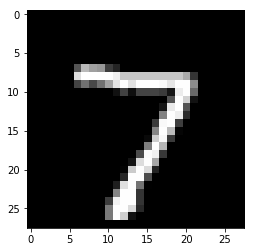

Model prediction: 7


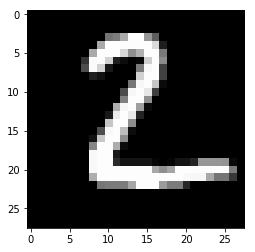

Model prediction: 2


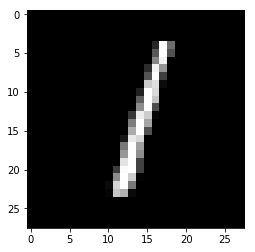

Model prediction: 1


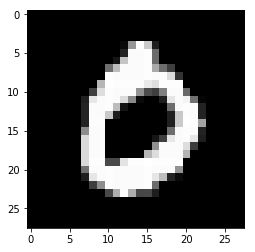

Model prediction: 0


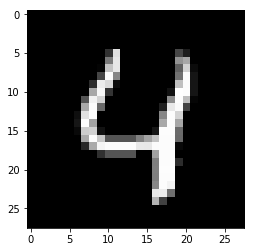

Model prediction: 4


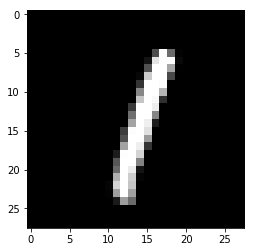

Model prediction: 1


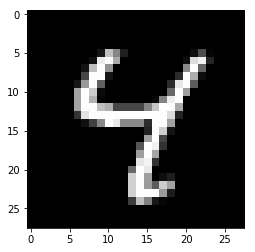

Model prediction: 4


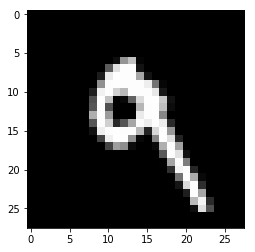

Model prediction: 9


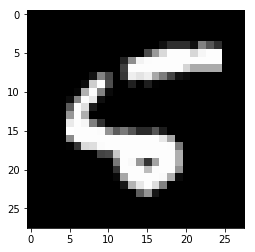

Model prediction: 6


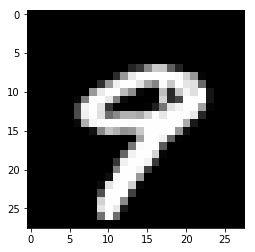

Model prediction: 9


In [49]:
# Predict single images
n_images = 10
# Get images from test set
test_images = mnist.test.images[:n_images]
# Prepare the input data
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images}, shuffle=False)
# Use the model to predict the images class
preds = list(model.predict(input_fn))

# Display
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", preds[i])
